To do:
- Graph total emissions by top emitting countries
- Create ARIMA? model to make predictions on CO2 emissions
- 

# CO2 Emissions Data Analysis Project

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sb

## Import Dataset

In [20]:
data = pd.read_csv('co2_by_sector.csv')
data['date'] = pd.to_datetime(data['date'], format = "%d/%m/%Y")
pd.plotting.register_matplotlib_converters()

# Create month-year column
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['month-year'] = data['date'].dt.to_period('M')
data.head()

,country,date,sector,value,timestamp,month,year,month-year
0,Brazil,2019-01-01,Power,0.096799,1546300800,1,2019,2019-01
1,China,2019-01-01,Power,14.816100,1546300800,1,2019,2019-01
2,EU27 & UK,2019-01-01,Power,1.886490,1546300800,1,2019,2019-01
3,France,2019-01-01,Power,0.051217,1546300800,1,2019,2019-01
4,Germany,2019-01-01,Power,0.315002,1546300800,1,2019,2019-01


## Initial 

In [17]:
# Top CO2 emission countries for the past 5 years
data.groupby('country')['value'].describe().sort_values(by = 'mean', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
WORLD,9672.0,16.081433,14.037780,0.243169,1.273543,15.979450,29.873100,46.26350
China,9672.0,4.963097,5.521288,0.014837,0.165301,2.465250,11.404700,19.08510
ROW,9672.0,4.796590,4.025250,0.022096,0.545837,4.910065,9.228238,11.66370
US,9672.0,2.236541,1.739606,0.054637,0.433867,2.516000,3.801960,6.64273
EU27 & UK,9672.0,1.447901,1.040176,0.001895,0.397427,1.637780,2.363532,4.26851


In [18]:
# Bottom CO2 emission countries for the past 5 years
data.groupby('country')['value'].describe().sort_values(by = 'mean', ascending = True).head()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Spain,9672.0,0.113703,0.082701,0.000497,0.049916,0.102004,0.168129,0.344131
France,9672.0,0.137354,0.122037,0.000078,0.036228,0.092573,0.232011,0.495378
Italy,9672.0,0.147137,0.116003,0.000115,0.027799,0.150124,0.251445,0.508076
UK,9672.0,0.165974,0.117352,0.000086,0.066561,0.159741,0.268603,0.478916
Brazil,9672.0,0.189875,0.172759,0.001055,0.027830,0.101734,0.357662,0.594167


## Time Series Visualization

In [3]:
# Make array of unique sectors and countries
uniq_sectors = data['sector'].unique()
uniq_countries = data['country'].unique()

#### Total CO2 Emissions over Time

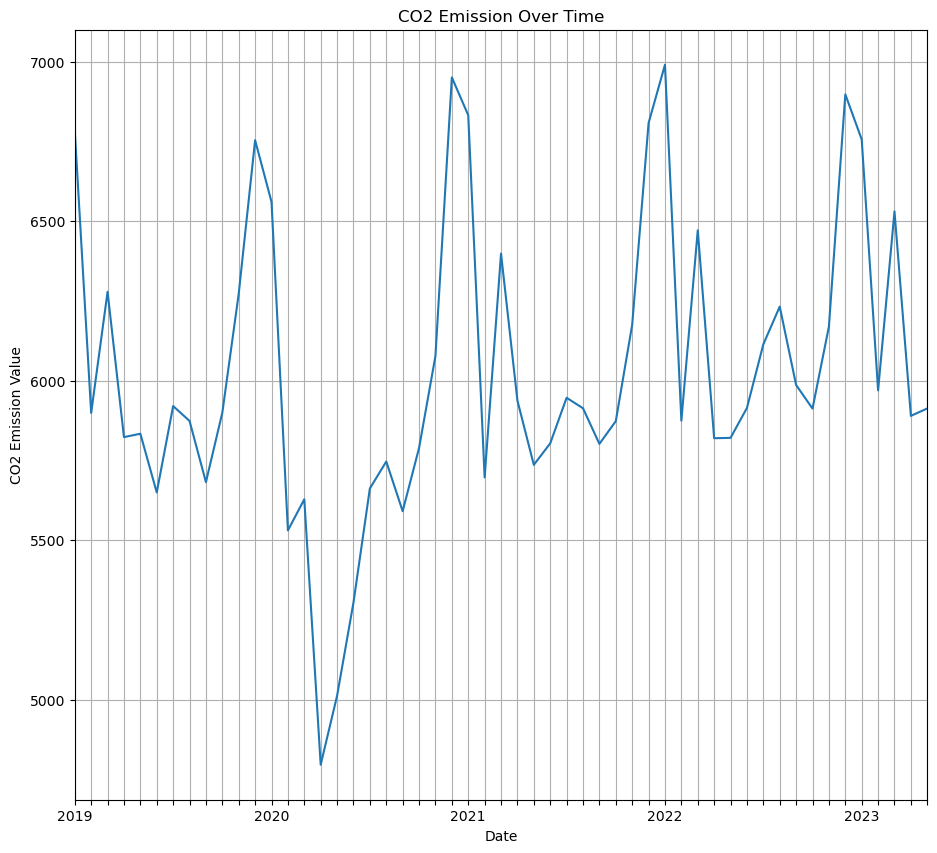

In [4]:
total_emissions = data.groupby(['month-year'])['value'].sum()

# Create plot
total_emissions.plot.line(figsize = (11,10),)
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title('CO2 Emission Over Time')
plt.xticks(total_emissions.index)
plt.grid(True)
plt.show()

#### Total CO2 Emissions by Year and Sector

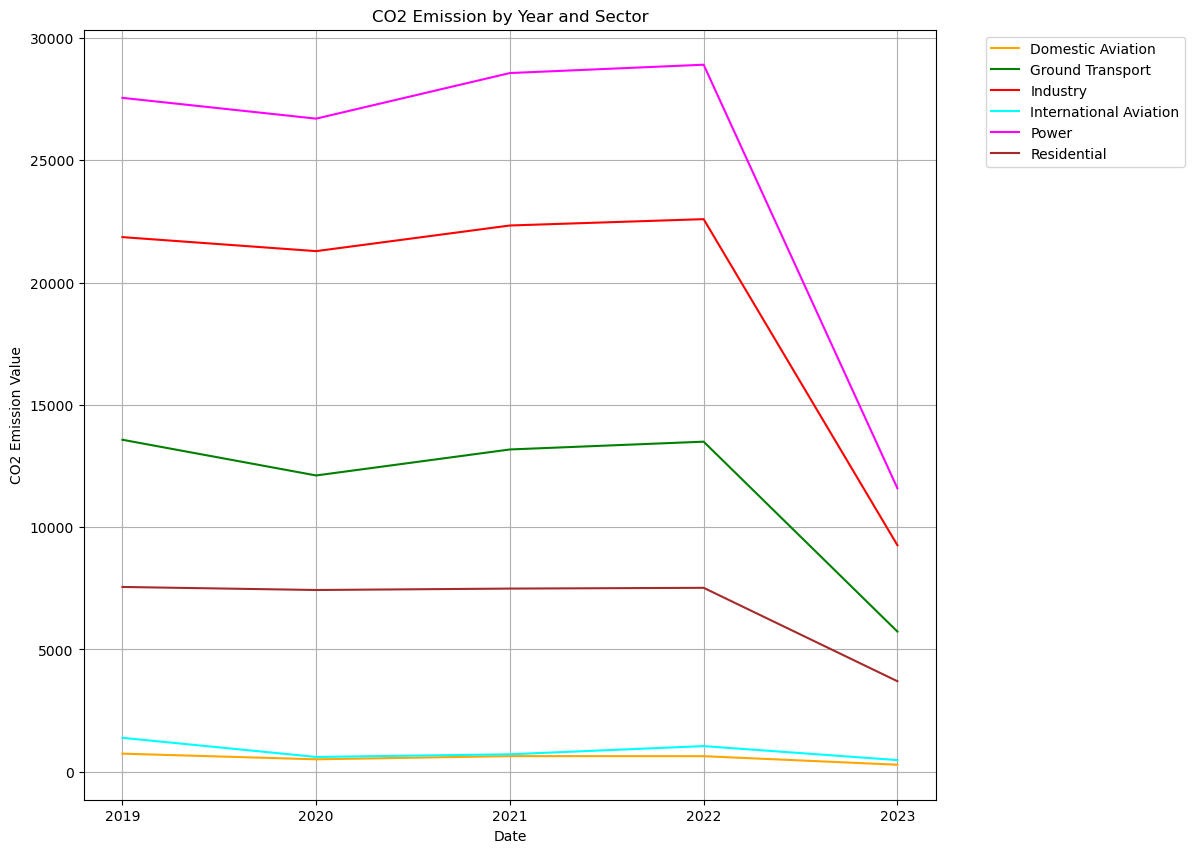

In [23]:
# Add column of total CO2 emissions by sector
total_emissions_sector_yr = data.groupby(['year','sector'])['value'].sum().unstack()
total_emissions_sector_yr.head()

# Create plot
total_emissions_sector_yr.plot(figsize = (11,10), color=['orange', 'green', 'red', 'cyan', 'magenta', 'brown'])
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission by Year and Sector')
plt.xticks(total_emissions_sector_yr.index)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#### Total CO2 Emissions by Month and Year

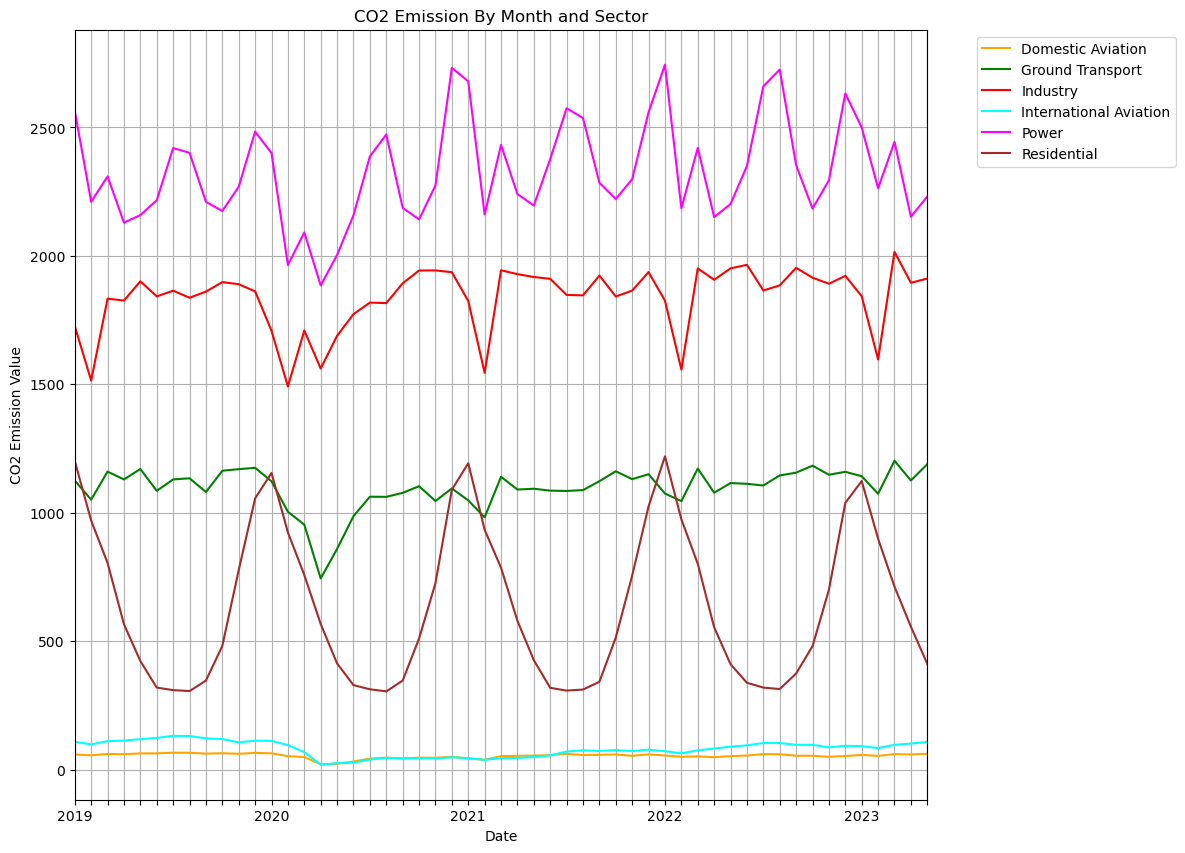

In [22]:
# Add column of total CO2 emissions by sector
total_emissions_sector_mo = data.groupby(['month-year','sector'])['value'].sum().unstack()
total_emissions_sector_mo.head()

# Create plot
total_emissions_sector_mo.plot(figsize = (11,10), color=['orange', 'green', 'red', 'cyan', 'magenta', 'brown'])
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission By Month and Sector')
plt.xticks(total_emissions_sector_mo.index)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#### Average Daily CO2 Emissions by Day of the Week for Each Year, by Sector

## Time Series Analysis

Find true trend of all sectors seperately and combine that time series model to find true total trend? Compare to model a detrended time series model with all of the sectors combined.

#### True Trend: Power Sector

In [24]:
# Apply Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your temperature data into a DataFrame (assuming 'date' and 'temperature' columns)
# Replace 'frequency' with the appropriate seasonal cycle length (e.g., 12 for monthly data)
result = seasonal_decompose(data['temperature'], model='additive', freq=frequency)

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(10, 6))
result.plot()
plt.show()

# Deseasonalize the data
deseasonalized_temperature = data['temperature'] - result.seasonal

#### ARIMA Model?